# Machine Learning Foundation

## Section 1, Part e: Hypothesis Testing


## Objectives:

After this discussion, you should be able to:

*   Know the difference between a null and alternative hypothesis
*   Write your own set of hypotheses for testing


In [9]:
# Import required libraries
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy import stats  # For statistical analysis
import math  # For basic math functions

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size
plt.rcParams['axes.grid'] = True  # Add grid by default

## Null Hypothesis

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?


---

### Determining the Null and Alternative Hypothesis

Write the null and alternative hypotheses!

Null: He is not special

Alternative: He is special

---


**Null:** I'm not special; my true rate of flip prediction is 0.5.

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.


---

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/\~mbognar/applets/bin.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. (In a traditional statistics class, this is the part where we'd turn to a table in the back of the book.)


In [10]:
# Calculate probability for hypothesis testing
from scipy.stats import binom

# Calculate P(X ≥ 57) with n=100, p=0.5 
prob = 1 - binom.cdf(56, 100, 0.5)  # 1 - P(X ≤ 56)

# Print result as percentage
print(str(round(prob*100, 1))+"%")

9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

***

Conversely, we can figure out what the 95% cutoff is beforehand.

***

### Exercise

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

***


In [11]:
# Find minimum number of correct guesses for statistical significance
from scipy.stats import binom

# Find 95th percentile of binomial distribution with n=100, p=0.5
# Add 1 since ppf returns x where P(X ≤ x) = 0.95
min_correct = binom.ppf(0.95, 100, 0.5) + 1
print(f"Minimum number of correct guesses needed: {min_correct}")

Minimum number of correct guesses needed: 59.0


Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.

***


## A More Specific Claim

So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:

> "I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, **we have two competing hypotheses**:
\* Hypothesis A: There is no predictive power
\* Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.


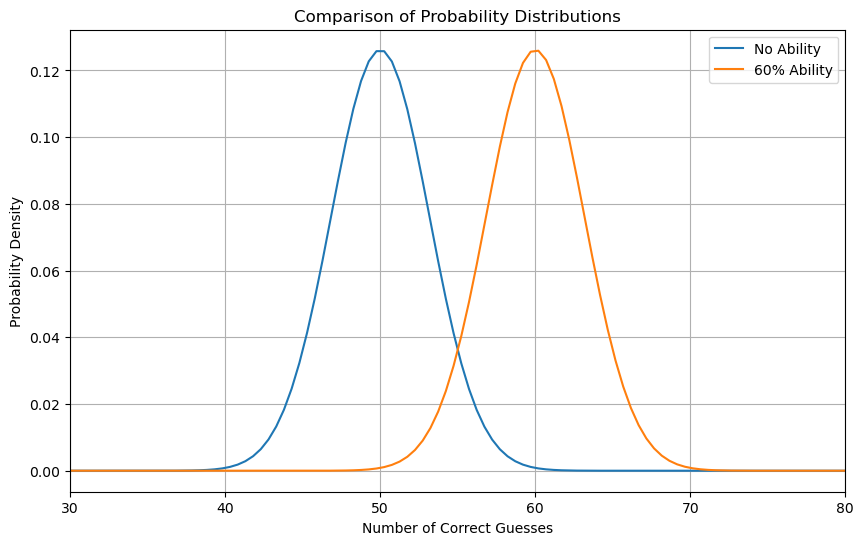

In [12]:
# Plot comparison of two normal distributions

# Parameters for first distribution (no predictive ability)
mu1 = 50  # Mean
variance = 10  # Variance
sigma = math.sqrt(variance)  # Standard deviation
x = np.linspace(1, 100, 200)  # Create 200 points from 1 to 100
plt.plot(x, stats.norm.pdf(x, mu1, sigma), label='No Ability')

# Parameters for second distribution (60% predictive ability)
mu2 = 60  # Mean
plt.plot(x, stats.norm.pdf(x, mu2, sigma), label='60% Ability')

# Configure plot
plt.xlim(30, 80)  # Set x-axis limits
plt.legend()  # Show legend
plt.title('Comparison of Probability Distributions')
plt.xlabel('Number of Correct Guesses')
plt.ylabel('Probability Density')
plt.grid(True)  # Add grid
plt.show()

**And 57 correct guesses falls within the 95% confidence of both the curves:**


In [13]:
# Calculate probabilities for 57 correct guesses under both hypotheses

# H0: No predictive ability (p=0.5)
p_h0 = 1 - binom.cdf(57, 100, 0.5)
print("Probability under H0:", p_h0)

# H1: 60% predictive ability (p=0.6)
p_h1 = binom.cdf(57, 100, 0.6)
print("Probability under H1:", p_h1)

Probability under H0: 0.06660530960360689
Probability under H1: 0.3032601298434457


What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.


### 1) Decrease confidence

Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.


In [14]:
# Calculate probabilities with new cutoff point (55 correct guesses)

# H0: No predictive ability (p=0.5)
p_h0_new = 1 - binom.cdf(55, 100, 0.5)
print("Probability under H0 with cutoff 55:", p_h0_new)

# H1: 60% predictive ability (p=0.6)
p_h1_new = binom.cdf(54, 100, 0.6)
print("Probability under H1 with cutoff 55:", p_h1_new)

Probability under H0 with cutoff 55: 0.13562651203691767
Probability under H1 with cutoff 55: 0.1310904526197477


\*\* At an 87% percent confidence level, we can say that I have some predictive power, since I got 57 tosses correct.\*\*

Not ideal; we picked a number, which is prone to bias, rather than a confidence interval.


### 2) Be biased

But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:


In [15]:
# Find cutoff point for 95% significance level
cutoff = binom.ppf(0.95, 100, 0.5)  # 95th percentile
print(f"Cutoff point for 95% significance: {cutoff}")

Cutoff point for 95% significance: 58.0


Then our cutff is 58. Our two errors will be:


In [16]:
# Calculate Type I and Type II errors with cutoff at 58

# Type I Error (α): probability of rejecting H0 when H0 is true
type_1_error = 1 - binom.cdf(58, 100, 0.5)
print("Type I Error (α):", type_1_error)

# Type II Error (β): probability of failing to reject H0 when H1 is true
type_2_error = binom.cdf(58, 100, 0.6)
print("Type II Error (β):", type_2_error)

Type I Error (α): 0.04431304005703385
Type II Error (β): 0.37746732387782933


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other.


### 3) Increase sample size

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.


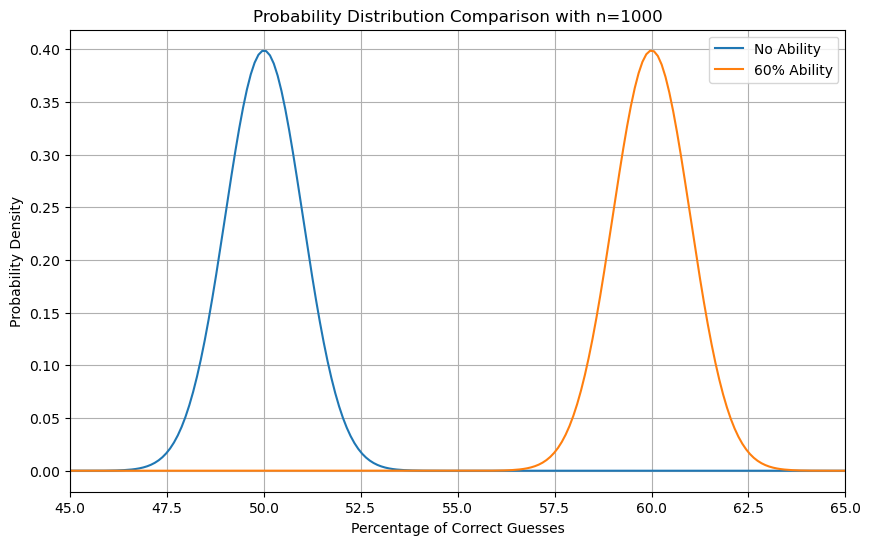

In [17]:
# Plot comparison with larger sample size (n=1000)

# Parameters for first distribution (no predictive ability)
mu1 = 50
variance = 1  # Reduced variance due to larger sample size
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x, stats.norm.pdf(x, mu1, sigma), label='No Ability')

# Parameters for second distribution (60% predictive ability)
mu2 = 60
plt.plot(x, stats.norm.pdf(x, mu2, sigma), label='60% Ability')

# Configure plot
plt.xlim(45, 65)
plt.legend()
plt.title('Probability Distribution Comparison with n=1000')
plt.xlabel('Percentage of Correct Guesses')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

The two normal curves are completely seperated now.


# Hypothesis Testing Example with Fuel Consumption Data

Let's test the following hypothesis:

H0: There is no difference in mean fuel consumption between Compact cars and SUVs (μCompact = μSUV)
H1: There is a difference in mean fuel consumption between Compact cars and SUVs (μCompact ≠ μSUV)

We will use a t-test to test this hypothesis.

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

# Get samples for Compact cars and SUVs
compact_mpg = data[data['VEHICLECLASS'] == 'COMPACT']['FUELCONSUMPTION_COMB_MPG']
suv_mpg = data[data['VEHICLECLASS'] == 'SUV - SMALL']['FUELCONSUMPTION_COMB_MPG']

# Perform t-test
t_stat, p_value = stats.ttest_ind(compact_mpg, suv_mpg)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Compare with significance level α = 0.05
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H0")
    print("There is statistical evidence to conclude that mean fuel consumption differs between Compact cars and SUVs")
else:
    print("\nConclusion: Fail to reject H0")
    print("Insufficient statistical evidence to conclude that mean fuel consumption differs")

T-statistic: 6.525381567791463
P-value: 2.612398550702161e-10

Conclusion: Reject H0
There is statistical evidence to conclude that mean fuel consumption differs between Compact cars and SUVs



Descriptive Statistics:

Compact cars:
count    172.000000
mean      31.145349
std        6.823320
min       17.000000
25%       27.000000
50%       31.000000
75%       35.000000
max       60.000000
Name: FUELCONSUMPTION_COMB_MPG, dtype: float64

SUV cars:
count    154.000000
mean      27.032468
std        4.039703
min       17.000000
25%       25.000000
50%       27.000000
75%       30.000000
max       37.000000
Name: FUELCONSUMPTION_COMB_MPG, dtype: float64


C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_10732\2698780054.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([compact_mpg, suv_mpg], labels=['Compact', 'SUV'])


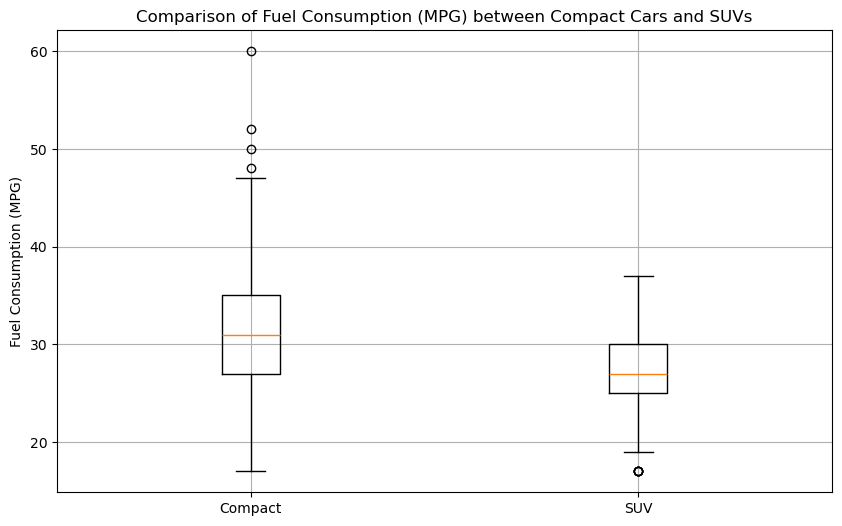

In [19]:
plt.figure(figsize=(10, 6))

# Create boxplot
plt.boxplot([compact_mpg, suv_mpg], labels=['Compact', 'SUV'])
plt.title('Comparison of Fuel Consumption (MPG) between Compact Cars and SUVs')
plt.ylabel('Fuel Consumption (MPG)')

# Add descriptive statistics
print("\nDescriptive Statistics:")
print("\nCompact cars:")
print(compact_mpg.describe())
print("\nSUV cars:")
print(suv_mpg.describe())

plt.show()

In [20]:
# Find cutoff points for both distributions with n=1000

# Cutoff point for 95% significance level under H0
cutoff_h0 = binom.ppf(0.95, 1000, 0.5) + 1
print(f"Cutoff point for H0 (95%): {cutoff_h0}")

# Cutoff point for 5% significance level under H1
cutoff_h1 = binom.ppf(0.05, 1000, 0.6)
print(f"Cutoff point for H1 (5%): {cutoff_h1}")

Cutoff point for H0 (95%): 527.0
Cutoff point for H1 (5%): 574.0


---

### Exercise

What are our errors now?

---


In [21]:
# Calculate Type I and Type II errors with n=1000

# Type I Error (α): probability of rejecting H0 when H0 is true
type_1_error = 1 - binom.cdf(550, 1000, 0.5)
print("Type I Error (α):", type_1_error)

# Type II Error (β): probability of failing to reject H0 when H1 is true
type_2_error = binom.cdf(550, 1000, 0.6)
print("Type II Error (β):", type_2_error)

Type I Error (α): 0.0006958707972110068
Type II Error (β): 0.0007412028990060172


**With a cutoff of 550, both our errors come down to under 0.1%.**


***

### Machine Learning Foundation (C) 2020 IBM Corporation
